# ◆Mushroom Classification Safe to eat or deadly poison?
### 目的：形状や生息地等からきのこが食用か有毒かを識別する
### 目的変数をclass(食用か有毒か)とする二値分類問題としてロジスティック回帰モデルを構築する
- kaggle URL:https://www.kaggle.com/uciml/mushroom-classification/data
- Create Date：2020/01/07　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

### 【手順】

### 0.Notebook内で利用する関数の定義

### 1.データ読込
- 欠損項目を確認する

### 2.データ前処理
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

### 3.モデル構築
- ロジスティック回帰モデルを利用する
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力（確率値）：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  f(\mathbf{w}^{\mathrm{T}} \mathbf{x})$
- $f$はシグモイド関数：$f(x) = \frac{1}{1 + \exp(-x)}$

### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

### ※データセット
- 「mushrooms.csv」（データ数：378,661行15列）

| id |項目|説明|型|特記事項|
|:---:|:---:|:---:|:---:|:---:|
|1|class|毒キノコか|カテゴリ|毒キノコ=p、食用キノコ=e|
|2|cap-shape|傘形状|カテゴり|ベル型=b、円錐型=c、饅頭型=x、扁平型=f、コブ型=k、凹んだ扁平型=s|
|3|cap-surface|傘表面|カテゴリ|繊維=f、溝=g、鱗片=y、滑らか=s|
|4|cap-color|傘の色|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、グリーン=r、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|5|bruises|斑点|2値|斑点あり=t、反転なし=f|
|6|odor|臭気|カテゴリ|アーモンド=a、アニス=l、クレオソート=c、フィッシュ=y、ファウル=f、ミューズイ=m、なし=n、辛味=p、スパイシー=s|
|7|gill-attachment|ひだの付き方|カテゴリ|直生=a、垂生=d、離生=f、凹生=n|
|8|gill-spacing|ひだの間隔|カテゴリ|近い=c、過密=w、長い=d|
|9|gill-size|ひだのサイズ|2値|広い=b、狭い=n|
|10|gill-color|ひだの色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グレー=g、グリーン=r、オレンジ=o、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|11|stalk-shape|柄の形状|2値|広がり=e、先細り=t|
|12|stalk-root|柄の根|カテゴリ|球根=b、クラブ=c、カップ=u、等しい=e、根茎形態=z、根=r、無し=?|
|13|stalk-surface-above-ring|柄-表面上のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|14|stalk-surface-below-ring|柄-表面下のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|15|stalk-color-above-ring|柄の色-上リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|16|stalk-color-below-ring|柄の色-下リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|17|veil-type|つぼの種類|2値|内皮膜=p、外皮膜=u|
|18|veil-color|つぼの色|カテゴリ|ブラウン=n、オレンジ=o、ホワイト=w、イエロー=y|
|19|ring-number|つばの数|カテゴリ|none=n、one=o、two=t|
|20|ring-type|つばの種類|カテゴリ|クモの巣状=c、消失性=e、炎のような=f、大きな=l、無し=n、垂れた=p、環帯=z|
|21|spore-print-color|胞子の色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グリーン=r、オレンジ=o、パープル=u、ホワイト=w、イエロー=y|
|22|population|集団形成方法|カテゴリ|大多数=a、群れを成して=c、多数=n、分散=s、数個=v、孤立=y|
|23|habitat|生息地|カテゴリ|牧草=g、葉=1、牧草地=m、小道=p、都市=u、廃棄物=w、森=d|

## 0.Notebook内で利用する関数の定義

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support

## 1.データ読込

In [2]:
# ****************************************************************************
# ◆ 1.データ読込
# ****************************************************************************
df= pd.read_csv('./input/mushrooms.csv')

print("\n▼ 先頭5行表示")
display(df.head(5))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))


▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



▼ 基本統計量


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



▼ 欠損データ確認


,Missing num


## 2.データ前処理
### 2-1.目的変数の確認


▼ 目的変数classの種類（%）


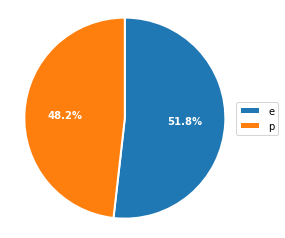

→食用のほうが若干多い

▼ 件数（食用キノコ=1，毒キノコ=0）


,class
1,4208
0,3916



▼ 食用きのこ率
baseline= 0.517971442639094

▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# ****************************************************************************
# ◆ 2.前処理
# ****************************************************************************
# ------------------------------------------------
# 2-1.目的変数の確認
# ------------------------------------------------
print('\n▼ 目的変数classの種類（%）')
per_class = round(df['class'].value_counts() / len(df['class']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

# 変換（食用キノコ=1，毒キノコ=0）
df['class'] = df['class'].map({'p': 0,'e': 1})

print('\n▼ 件数（食用キノコ=1，毒キノコ=0）')
display(pd.DataFrame(df['class'].value_counts(),columns=['class']))

# 食用率の平均
print('\n▼ 食用きのこ率')
baseline = df['class'].mean()
print('baseline=',baseline)

print("\n▼ 先頭5行表示")
display(df.head(5))


### 2-2.説明変数の前処理

In [9]:
# ------------------------------------------------
# 2-3-3.カラムの確認
# ------------------------------------------------
print('\n ▼ カラムの型リスト表示 ')
col_list = df.columns.tolist() 
display(df[col_list].dtypes.sort_values()) 

# int64リスト
int_cols = df[col_list].dtypes[df[col_list].dtypes=='int64'].index.tolist()
# objectリスト
obj_cols = df[col_list].dtypes[df[col_list].dtypes=='object'].index.tolist()

# 名前の変換
v_01={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(v_01)
v_02={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(v_02)
v_03={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(v_03)
v_04={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(v_04)
v_05={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(v_05)
v_06={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(v_06)
v_07={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(v_07)
v_08={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(v_08)
v_09={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(v_09)
v_10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(v_10)
v_11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(v_11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(v_11)
v_12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(v_12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(v_12)
v_13={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(v_13)
v_14={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(v_14)
v_15= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(v_15)
v_16={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(v_16)
v_17= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(v_17)
v_18={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(v_18)
v_19={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(v_19)
v_20={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(v_20)


 ▼ カラムの型リスト表示 


class                        int64
spore-print-color           object
ring-type                   object
ring-number                 object
veil-color                  object
veil-type                   object
stalk-color-below-ring      object
stalk-color-above-ring      object
stalk-surface-below-ring    object
stalk-surface-above-ring    object
population                  object
stalk-root                  object
gill-color                  object
gill-size                   object
gill-spacing                object
gill-attachment             object
odor                        object
bruises                     object
cap-color                   object
cap-surface                 object
cap-shape                   object
stalk-shape                 object
habitat                     object
dtype: object


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

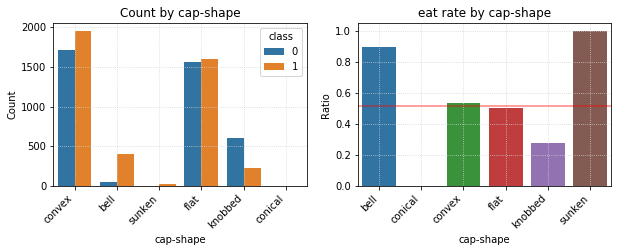


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

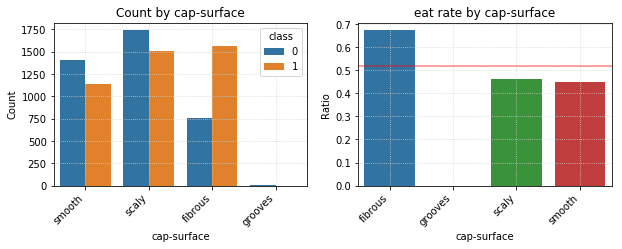


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

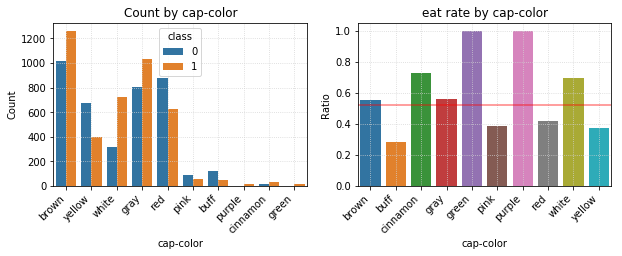


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

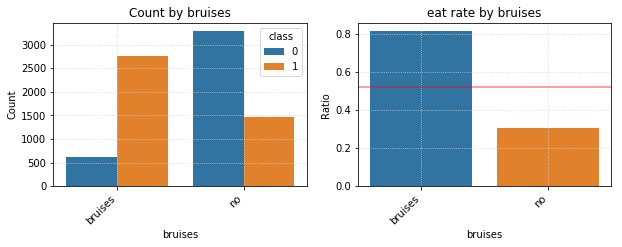


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

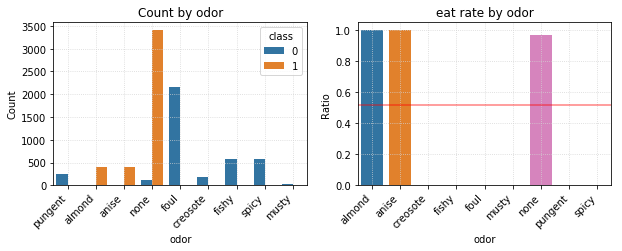


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

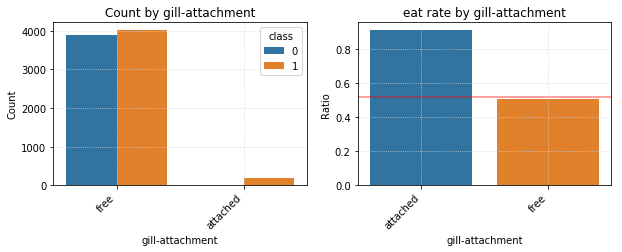


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

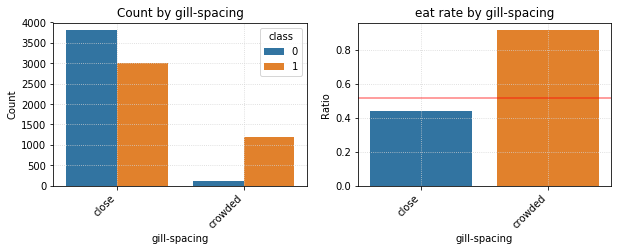


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

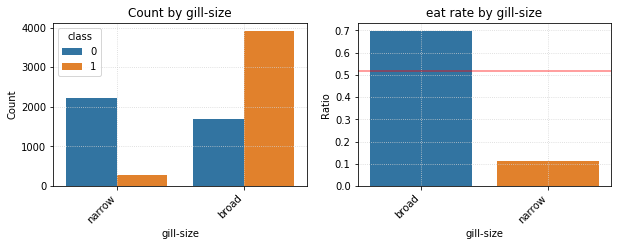


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

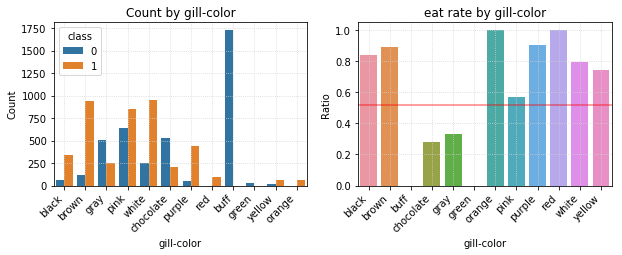


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

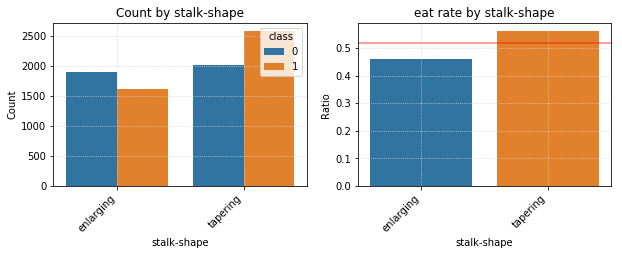


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

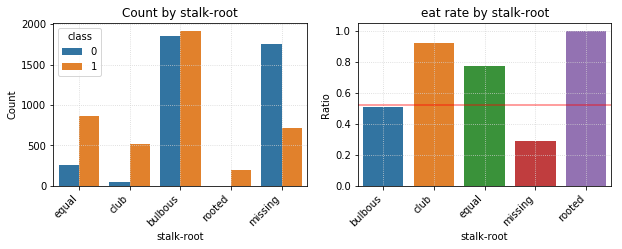


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

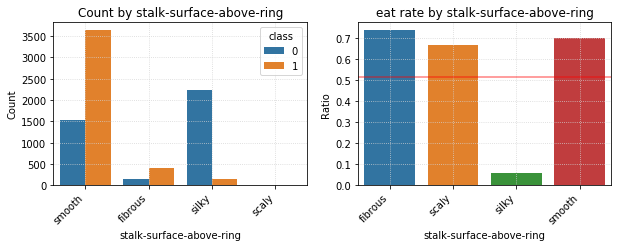


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

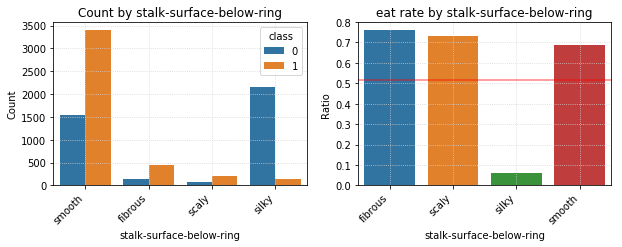


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

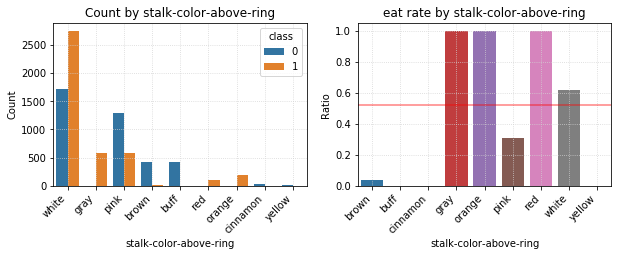


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

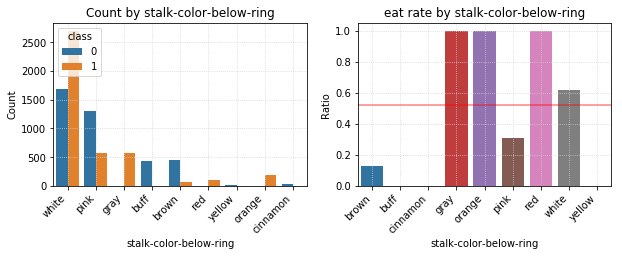


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

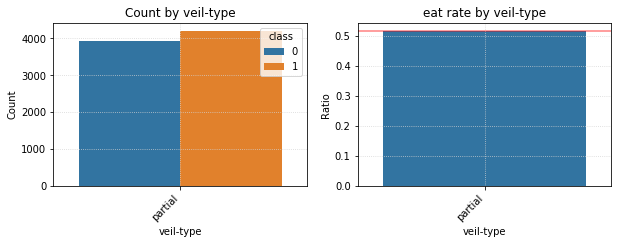


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

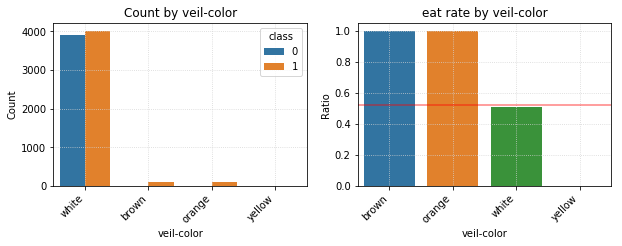


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

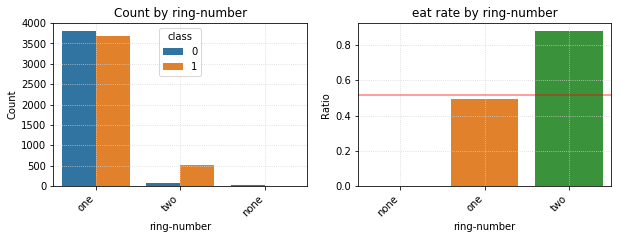


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

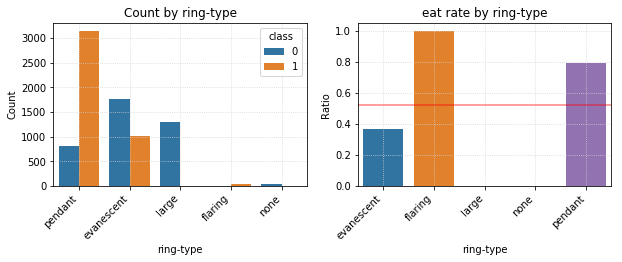


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

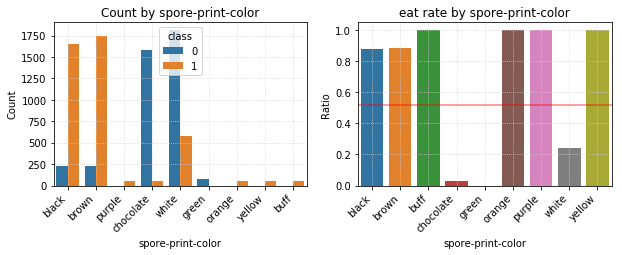


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

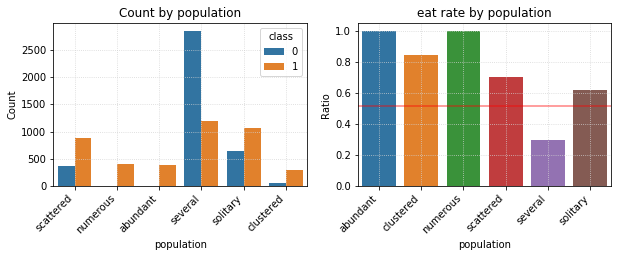


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

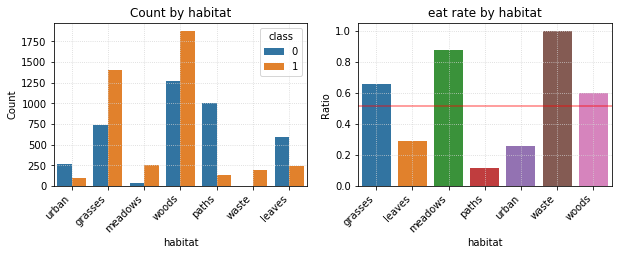

In [5]:
# ------------------------------------------------
# 2-3-3.カテゴリ項目の確認
# ------------------------------------------------    

for col_name in obj_cols:
    print('\n ──────────────────────────────────────── ')
    plt.subplots_adjust(wspace=2.0, hspace=2.0) # 余白
    plt.figure(figsize=(10,3))
    
    # カウントプロット
    plt.subplot(1,2,1)
    ax = sns.countplot(df[col_name],hue=df['class'])
    ax.set_title('Count by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Count')
    
    # 食用率プロット
    plt.subplot(1,2,2)
    eat_rate = pd.DataFrame(df['class'].groupby(df[col_name]).mean())
    eat_rate.reset_index(inplace = True) # index振り直し
    ax = sns.barplot(x=col_name, y="class", data=eat_rate)
    ax.axhline(baseline, alpha=0.5, color='red') # 平均値
    ax.set_title('eat rate by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Ratio')
    plt.show()


### 2-5.ダミー変換

In [6]:
# ------------------------------------------------
# 2-5.ダミー変換
# ------------------------------------------------
# one-hot-encoding
df_dummies = pd.get_dummies(df,obj_cols)

print('\n▼ 説明変数の数')
print(len(df_dummies.drop('class', axis=1).columns))

print('\n▼ 先頭5行表示')
pd.set_option('display.max_columns', 500)
display(df_dummies.head(5))


▼ 説明変数の数
117

▼ 先頭5行表示


,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow,stalk-shape_enlarging,stalk-shape_tapering,stalk-root_bulbous,stalk-root_club,stalk-root_equal,stalk-root_missing,stalk-root_rooted,stalk-surface-above-ring_fibrous,stalk-surface-above-ring_scaly,stalk-surface-above-ring_silky,stalk-surface-above-ring_smooth,stalk-surface-below-ring_fibrous,stalk-surface-below-ring_scaly,stalk-surface-below-ring_silky,stalk-surface-below-ring_smooth,stalk-color-above-ring_brown,stalk-color-above-ring_buff,stalk-color-above-ring_cinnamon,stalk-color-above-ring_gray,stalk-color-above-ring_orange,stalk-color-above-ring_pink,stalk-color-above-ring_red,stalk-color-above-ring_white,stalk-color-above-ring_yellow,stalk-color-below-ring_brown,stalk-color-below-ring_buff,stalk-color-below-ring_cinnamon,stalk-color-below-ring_gray,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## 3.モデル構築


▼ 重みを表示（絶対値の降順：Top10）


,feature,weight
0,odor_none,75.905153
1,gill-size_narrow,-54.153330
2,gill-size_broad,52.856865
3,odor_foul,-51.093173
4,spore-print-color_green,-45.600398
5,odor_almond,44.633112
6,odor_pungent,-44.343088
7,stalk-root_bulbous,-42.834666
8,odor_creosote,-40.127627
9,odor_anise,36.156166



▼ 重みの大きさを横棒グラフで表示


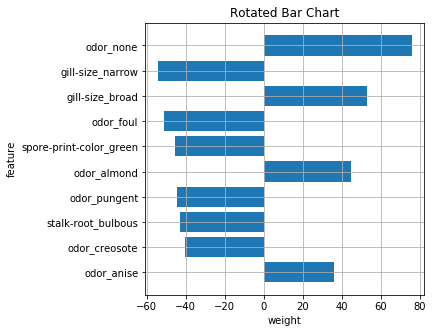

In [7]:
# ****************************************************************************
# ◆ 3.モデル構築
# ****************************************************************************
# ------------------------------------------------
# 3-1.モデルを生成して学習する  
# ------------------------------------------------
X = df_dummies.drop('class', axis=1).values # 説明変数
y = df_dummies['class'].values              # 目的変数

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# ロジスティック回帰モデル生成
clf = SGDClassifier(loss='log',           # ロジスティック回帰を指定
                    penalty='none',       # 正則化を入れる場合はL1､L2→Day2で実施
                    max_iter=10000,       # 繰り返し計算時の強制的終了値、誤差が収束すれば利用しない。
                    fit_intercept=True,   # 切片を有効にするかどうか
                    random_state=1234,    # 乱数のシード
                    tol=1e-3              # 収束する誤差の指定
                   )

# 学習
clf.fit(X_train, y_train)

#print('w0 = {:.3f}'.format(clf.intercept_[0]))

# 結果をDataFrameへ格納
res_df = pd.DataFrame(columns=['feature','weight','abs_w'])
res_df['feature'] = list(df_dummies.drop('class', axis=1).columns)
res_df['weight'] = np.reshape(clf.coef_[0], -1).tolist() # 重み
res_df['abs_w'] = abs(res_df['weight']) # 絶対値

# 重みの絶対値の降順ソート
print('\n▼ 重みを表示（絶対値の降順：Top10）')
res_df = res_df.sort_values('abs_w', ascending=False)
res_df.reset_index(drop=True,inplace=True)
res_df = res_df.drop('abs_w', axis=1)
res_df_head = res_df.head(10)
display(res_df_head.head(10))

# 重みの大きさを横棒グラフで表示
print('\n▼ 重みの大きさを横棒グラフで表示')
plt.figure(figsize=(5, 5))
plt.barh(np.arange(len(res_df_head['feature']))[::-1], res_df_head['weight'], align='center')
plt.yticks(np.arange(len(res_df_head['feature']))[::-1], res_df_head['feature'])
plt.title('Rotated Bar Chart')
plt.xlabel('weight')
plt.ylabel('feature')
plt.grid()
plt.show()


## 4.モデル評価

In [8]:
# ****************************************************************************
# ◆ 4.モデル評価
# ****************************************************************************
# ------------------------------------------------
# 4-1.モデル検証  
# ------------------------------------------------
y_est = clf.predict(X_test)

print('\n▼ モデルの予測結果(先頭10件)')
print(y_est[:11])

# 予測確率を出力
print('\n▼ 結果の予測確率(先頭10件)\n(毒キノコの確率：食用キノコの確率):')
print(clf.predict_proba(X_test)[:11])

# ------------------------------------------------
# 4-2.モデル評価結果
# ------------------------------------------------
print('\n▼ モデルの評価結果')

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# 食用に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

# 予測値と正解のクロス集計
print('\n▼ 混同行列')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 毒キノコ', '正解 =食用キノコ'], 
                        columns=['予測 = 毒キノコ', '予測 = 食用キノコ'])

display(conf_mat)


▼ モデルの予測結果(先頭10件)
[1 0 1 1 1 0 0 1 1 0 0]

▼ 結果の予測確率(先頭10件)
(毒キノコの確率：食用キノコの確率):
[[0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.53411435e-56]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.23894699e-84]
 [1.00000000e+00 1.33483042e-40]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.61881889e-73]
 [1.00000000e+00 1.06303570e-81]]

▼ モデルの評価結果
対数尤度 = -0.000
正答率 = 100.000%
適合率（Precision※精度) = 100.000%
再現率（Recall※検出率) = 100.000%
F1値（F1-score） = 100.000%

▼ 混同行列


,予測 = 毒キノコ,予測 = 食用キノコ
正解 = 毒キノコ,808,0
正解 =食用キノコ,0,817
